# Analyze Activation Space
## Imports

In [7]:
import os

src_dir = os.path.expanduser(os.environ.get('SRC_DIR', '/home/martin/Projekte/OGC_Testbed-18/software/testbed18-wilderness-workflow'))
os.chdir(src_dir)

import numpy as np
import matplotlib.pyplot as plt
import rasterio
from tqdm.auto import tqdm

from tlib import tgeo
from projects.testbed18 import config, utils


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
asos = utils.load_asos()
files = [os.path.join(config.data_folder_tiles, file) for file in asos.map_ids]

In [9]:
# config for plots

use_plotly = True  # only necessary if 3 dims; if False, matplotlib is used

if asos.dims == 1:
    plot_kwargs = {}
    use_plotly = False
elif asos.dims == 2:
    plot_kwargs = {'s': 0.01}
    use_plotly = False  # needs to be False for 2 dims
elif asos.dims == 3:
    s = 5 if use_plotly else 1

In [10]:
asos.vectors
asos.vectors.shape
asos.group_edge_coords
print(asos.group_sensitivities)

[ 1.28539109e-06  1.47963241e-06  1.57228269e-06  1.66694116e-06
  9.28586541e-07  1.12247842e-06  1.48580281e-06  1.34211180e-06
  1.48388406e-06  1.70847500e-06  9.59724602e-07  1.33964385e-06
  1.32673069e-06  1.39804992e-06  1.41199285e-06  1.69403513e-06
  1.02364051e-06  1.16619614e-06  1.31627884e-06  1.34370471e-06
  1.32537775e-06  1.43708575e-06  1.31899941e-06  1.70046546e-06
  1.19410543e-06  1.28737163e-06  1.27278691e-06  1.38543408e-06
  1.33613098e-06  1.28441430e-06  1.44357631e-06  1.38679646e-06
  1.71949492e-06 -6.20673279e-07  1.21894105e-06  1.24353665e-06
  1.31430332e-06  1.18822311e-06  1.21874914e-06  1.38758818e-06
  1.24839995e-06  1.31306278e-06  1.48720953e-06  1.24288439e-06
  1.58101214e-06  1.66943454e-06 -8.04172514e-07 -7.16019844e-07
 -6.14624707e-07 -5.18638172e-07 -7.99972279e-07 -7.03852559e-07
 -5.96102307e-07 -4.88532311e-07 -3.85774066e-07 -3.01447340e-07
 -6.98973114e-07 -5.80506661e-07 -4.74725507e-07 -3.73177814e-07
 -2.85667721e-07 -5.89160

## Vectorization

In [11]:
%matplotlib inline
# 2D with matplotlib
if asos.dims in [1, 2]:
    asos.plot_chspace(**plot_kwargs)
    plt.show()

# 3D with plotly
elif asos.dims == 3 and use_plotly:
    fig = asos.plot_chspace(colors='rgb', s=s, plotly=True)

In [12]:
%matplotlib widget
# 3D with matplotlib
if asos.dims == 3 and not use_plotly:
    asos.plot_chspace(colors='rgb', s=s)
    plt.show()

## Grouping

In [7]:
%matplotlib inline
# 2D with matplotlib
if asos.dims in [1, 2]:
    asos.plot_chspace(colors='groups', **plot_kwargs)
    plt.show()

# 3D with plotly
elif asos.dims == 3 and use_plotly:
    asos.plot_chspace(colors='groups', s=s, plotly=True)

predicting groups:   0%|          | 0/981 [00:00<?, ?it/s]

To get an interactive image in Jupyter Notebook, set '%matplotlib notebook'.


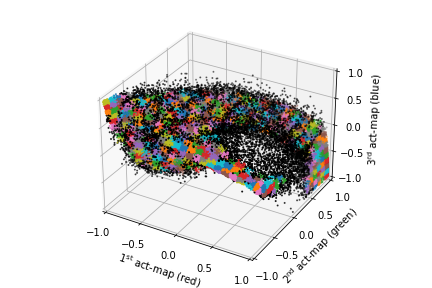

In [8]:
%matplotlib widget
# 3D with matplotlib
if asos.dims == 3 and not use_plotly:
    asos.plot_chspace(colors='groups', s=s)
    plt.show()

## Sensitivities

In [9]:
%matplotlib inline
# 2D with matplotlib
if asos.dims in [1, 2]:
    asos.plot_chspace(colors='sensitivities', **plot_kwargs)
    plt.show()

# 3D with plotly
elif asos.dims == 3 and use_plotly:
    asos.plot_chspace(colors='sensitivities', s=s, plotly=True)

predicting groups:   0%|          | 0/981 [00:00<?, ?it/s]

predicting sensitivities:   0%|          | 0/265558 [00:00<?, ?it/s]

To get an interactive image in Jupyter Notebook, set '%matplotlib notebook'.


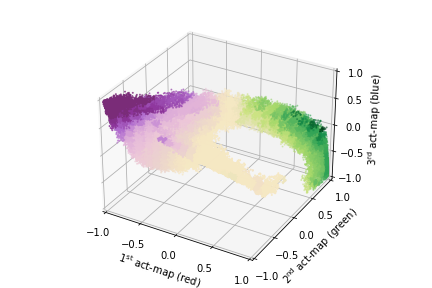

In [10]:
%matplotlib widget
# 3D with matplotlib
if asos.dims == 3 and not use_plotly:
    asos.plot_chspace(colors='sensitivities', s=s)
    plt.show()

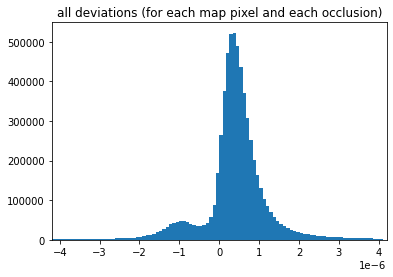

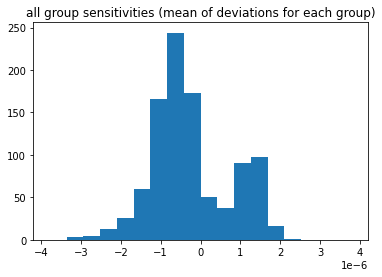

interactive(children=(IntSlider(value=0, description='sort_index', layout=Layout(width='99%'), max=980), Outpu…

In [11]:
%matplotlib inline
asos.plot_histograms()

In [12]:
#asos.adapt_valid_deviations(min_n_occluded_pixels=10)
#asos.set_vlim(q=0.02)
#asos.save()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]


predicting groups:   0%|          | 0/981 [00:00<?, ?it/s]

predicting sensitivities:   0%|          | 0/1 [00:00<?, ?it/s]

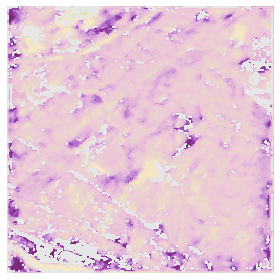

In [13]:
%matplotlib inline
# plot sample
index = 100
unet_map = utils.predict_activation_maps(files[index])
sensitivity_map = asos.predict_sensitivities(unet_map)
asos.plot_sensitivity_map(sensitivity_map[0])
plt.show()

## Land Cover

In [14]:
# get files and arrays
files_lcs = utils.get_corresponding_files(files, 'lcs')
lcs = np.stack([tgeo.geotif.get_array(file) for file in tqdm(files_lcs)])

# get channel names (from first files sample)
with rasterio.open(files_lcs[0]) as tif:
    lc_names = tif.descriptions
print(lc_names)

# vectorize
lc_vectors = asos.vectorize_same_way(maps=lcs)
lc_vectors = {lc_names[i]: lc_vectors[:, i] for i in range(len(lc_names))}
del lcs

# plot kwargs
if not use_plotly:
    lc_plot_kwargs = {lc_name: {'cmap': tgeo.landcover.get_params(lc=lc_name)['cmap'], 'norm': tgeo.landcover.get_params(lc=lc_name)['norm']} for lc_name in lc_names}
else:
    lc_plot_kwargs = {}
    for lc_name in lc_names:
        classes = tgeo.landcover.get_params(lc=lc_name)['classes']
        colors = tgeo.landcover.get_params(lc=lc_name)['colors']
        lc_plot_kwargs[lc_name] = {'color_discrete_map': {classes[i]: colors[i] for i in range(len(classes))}}

  0%|          | 0/4768 [00:00<?, ?it/s]

('CORINE', 'MODIS_1', 'CGLS', 'GlobCover')


In [15]:
%matplotlib inline
# 2D with matplotlib
if asos.dims in [1, 2]:
    for key in lc_vectors.keys():
        print(key)
        asos.plot_chspace(colors=lc_vectors[key], file_name=key, **plot_kwargs, **lc_plot_kwargs[key])
        plt.show()

# 3D with plotly
elif asos.dims == 3 and use_plotly:
    for key in lc_vectors.keys():
        asos.plot_chspace(colors=lc_vectors[key], file_name=key, s=s, plotly=True, **lc_plot_kwargs[key])

CORINE
To get an interactive image in Jupyter Notebook, set '%matplotlib notebook'.


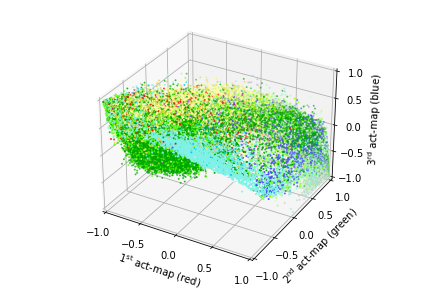

MODIS_1
To get an interactive image in Jupyter Notebook, set '%matplotlib notebook'.


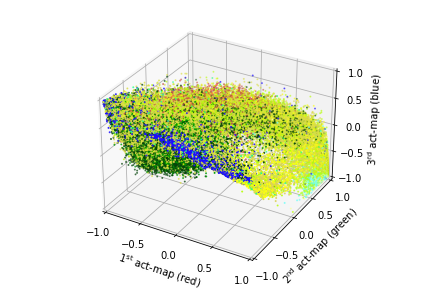

CGLS
To get an interactive image in Jupyter Notebook, set '%matplotlib notebook'.


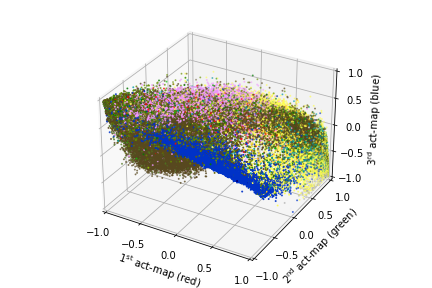

GlobCover
To get an interactive image in Jupyter Notebook, set '%matplotlib notebook'.


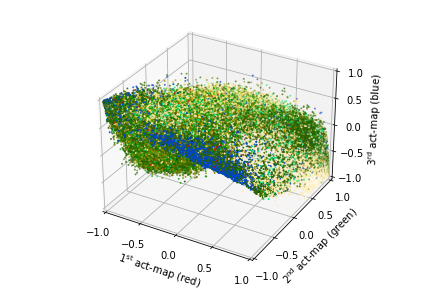

In [16]:
%matplotlib widget
# 3D with matplotlib
if asos.dims == 3 and not use_plotly:
    for key in lc_vectors.keys():
        print(key)
        asos.plot_chspace(colors=lc_vectors[key], file_name=key, s=s, **lc_plot_kwargs[key])
        plt.show()

Legends:

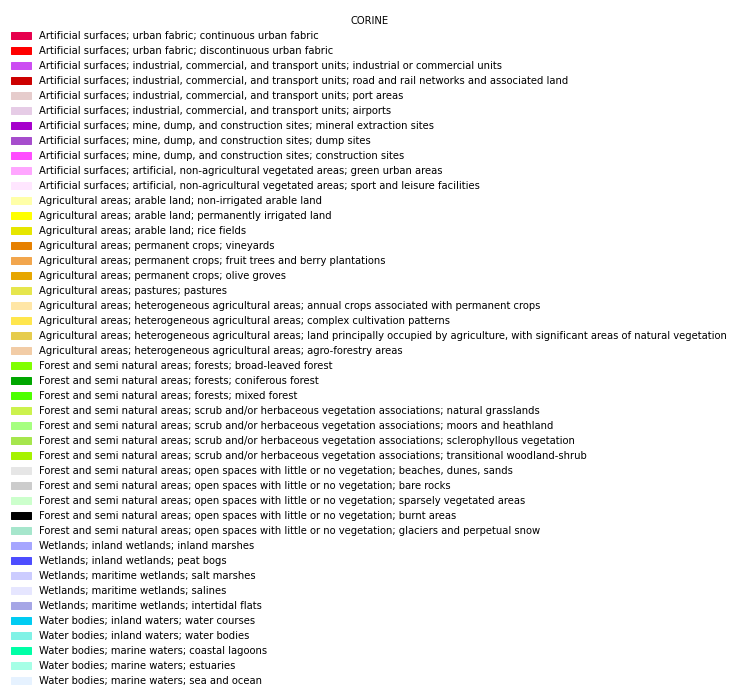

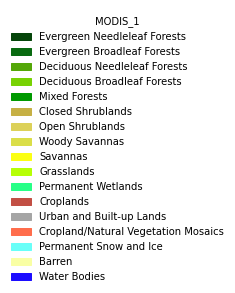

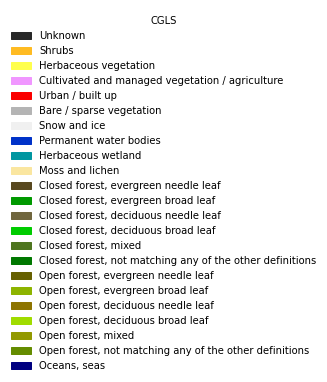

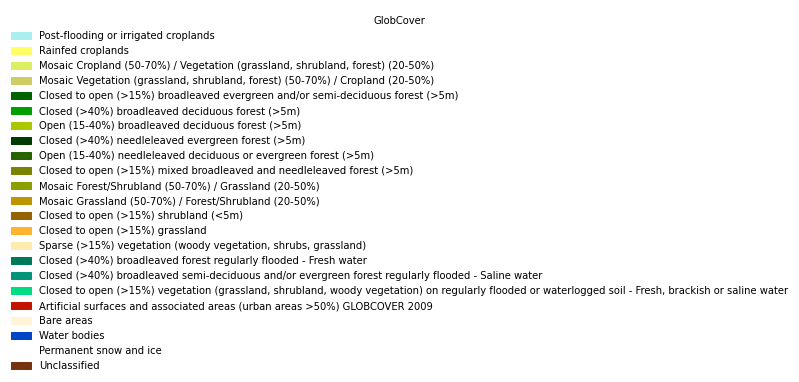

In [17]:
%matplotlib inline
for key in lc_vectors.keys():
    tgeo.landcover.plot_legend(key)
    plt.show()

## SCL

In [18]:
# get files and arrays
files_scl = utils.get_corresponding_files(files, 's2_scl')
scls = np.stack([tgeo.geotif.get_array(file, channels='SCL') for file in tqdm(files_scl)])

# vectorize
scl_vectors = asos.vectorize_same_way(maps=scls).squeeze()
del scls

# plot_kwargs
if not use_plotly:
    params = tgeo.landcover.get_params(lc='SCL')
    scl_plot_kwargs = {'cmap': params['cmap'], 'norm': params['norm']}
else:
    classes = tgeo.landcover.get_params(lc='SCL')['classes']
    colors = tgeo.landcover.get_params(lc='SCL')['colors']
    scl_plot_kwargs = {'color_discrete_map': {classes[i]: colors[i] for i in range(len(classes))}}

  0%|          | 0/4768 [00:00<?, ?it/s]

In [19]:
%matplotlib inline
# 2D with matplotlib
if asos.dims in [1, 2]:
    asos.plot_chspace(colors=scl_vectors, file_name='scl', **plot_kwargs, **scl_plot_kwargs)
    plt.show()

# 3D with plotly
elif asos.dims == 3 and use_plotly:
    asos.plot_chspace(colors=scl_vectors, file_name='scl', s=s, plotly=True, **scl_plot_kwargs)

To get an interactive image in Jupyter Notebook, set '%matplotlib notebook'.


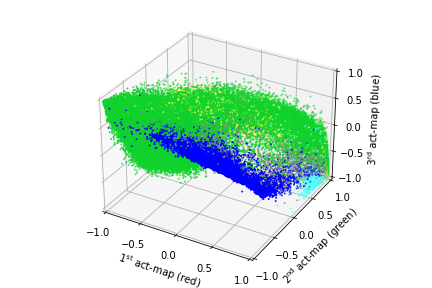

In [20]:
%matplotlib widget
# 3D with matplotlib
if asos.dims == 3 and not use_plotly:
    asos.plot_chspace(colors=scl_vectors, file_name='scl', s=s, **scl_plot_kwargs)
    plt.show()

Legend:

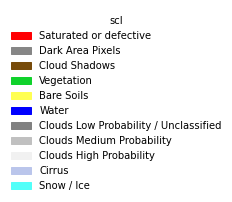

In [21]:
%matplotlib inline
tgeo.landcover.plot_legend('scl')
plt.show()

## Sentinel NDVI, EVI and RGB

In [ ]:
# get files and arrays
files_s2 = utils.get_corresponding_files(files, 's2')
s2_bands = ['B2', 'B3', 'B4', 'B8']
s2s = np.stack([tgeo.geotif.get_array(file, channels=s2_bands) for file in tqdm(files_s2)])

# vectorize
s2_vectors = asos.vectorize_same_way(maps=s2s)
del s2s

# get ndvi vectors
blue_vectors = s2_vectors[:, s2_bands.index('B2')].astype(float)
red_vectors = s2_vectors[:, s2_bands.index('B4')].astype(float)
nir_vectors = s2_vectors[:, s2_bands.index('B8')].astype(float)

ndvi_vectors = (nir_vectors - red_vectors) / (nir_vectors + red_vectors)
#ndvi_vectors = np.expand_dims(ndvi_vectors, 1)
evi_vectors = tgeo.utils.get_evi(nir=nir_vectors, red=red_vectors, blue=blue_vectors)

# ndvi plot_kwargs
if not use_plotly:
    ndvi_plot_kwargs = {'cmap': 'RdYlGn', 'vmin': -1, 'vmax': 1}
else:
    ndvi_plot_kwargs = {'cmap': 'RdYlGn', 'range_color': (-1, 1)}
    
# evi plot_kwargs
q = 0.02
vmin = np.quantile(evi_vectors, q=q)
vmax = np.quantile(evi_vectors, q=1-q)
if not use_plotly:
    evi_plot_kwargs = {'cmap': 'RdYlGn', 'vmin': vmin, 'vmax': vmax}
else:
    evi_plot_kwargs = {'cmap': 'RdYlGn', 'range_color': (vmin, vmax)}

# get rgb vectors
val_range = (0, 2**10)
rgb_vectors = s2_vectors[:, [s2_bands.index('B4'), s2_bands.index('B3'), s2_bands.index('B2')]]
rgb_vectors = rgb_vectors.clip(min=val_range[0], max=val_range[1])  # normalize
rgb_vectors = (rgb_vectors - val_range[0]) / (val_range[1] - val_range[0])  # normalize

# rgb plot_kwargs
rgb_plot_kwargs = {}

  0%|          | 0/4768 [00:00<?, ?it/s]

### EVI

In [6]:
%matplotlib inline
# 2D with matplotlib
if asos.dims in [1, 2]:
    asos.plot_chspace(colors=evi_vectors, file_name='evi', **plot_kwargs, **evi_plot_kwargs)
    plt.show()

# 3D with plotly
elif asos.dims == 3 and use_plotly:
    asos.plot_chspace(colors=evi_vectors, file_name='evi', s=s, plotly=True, **evi_plot_kwargs)

NameError: name 'evi_vectors' is not defined

In [ ]:
%matplotlib widget
# 3D with matplotlib
if asos.dims == 3 and not use_plotly:
    asos.plot_chspace(colors=evi_vectors, file_name='evi', s=s, **evi_plot_kwargs)
    plt.show()

### NDVI

In [ ]:
%matplotlib inline
# 2D with matplotlib
if asos.dims in [1, 2]:
    asos.plot_chspace(colors=ndvi_vectors, file_name='ndvi', **plot_kwargs, **ndvi_plot_kwargs)
    plt.show()

# 3D with plotly
elif asos.dims == 3 and use_plotly:
    asos.plot_chspace(colors=ndvi_vectors, file_name='ndvi', s=s, plotly=True, **ndvi_plot_kwargs)

In [ ]:
%matplotlib widget
# 3D with matplotlib
if asos.dims == 3 and not use_plotly:
    asos.plot_chspace(colors=ndvi_vectors, file_name='ndvi', s=s, **ndvi_plot_kwargs)
    plt.show()

### RGB

In [ ]:
%matplotlib inline
# 2D with matplotlib
if asos.dims in [1, 2]:
    asos.plot_chspace(colors=rgb_vectors, file_name='s2_rgb', **plot_kwargs, **rgb_plot_kwargs)
    plt.show()

# 3D with plotly
elif asos.dims == 3 and use_plotly:
    asos.plot_chspace(colors=rgb_vectors, file_name='s2_rgb', s=s, plotly=True, **rgb_plot_kwargs)

In [ ]:
%matplotlib widget
# 3D with matplotlib
if asos.dims == 3 and not use_plotly:
    asos.plot_chspace(colors=rgb_vectors, file_name='s2_rgb', s=s, **rgb_plot_kwargs)
    plt.show()